In [1]:
import pandas as pd
import nltk
import seaborn as sns
import re

sns.set()

In [3]:
#Importamos datasets de 1 solo tipo de comida
reviews = pd.read_parquet('https://storage.googleapis.com/restaurants_datalake/Comida_Americana.parquet')

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8298736 entries, 1 to 16007866
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Cod_Usuario    int32 
 1   Id_Restaurant  object
 2   Rating         int64 
 3   Reseña         object
 4   Timestamp      Int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 356.1+ MB


In [6]:
#Nos quedamos con las columnas que nos interesan
reseñas = reviews.drop(columns=['Cod_Usuario','Timestamp','Id_Restaurant'])
reseñas.head()

,Rating,Reseña
1,4,I love the food here. Service doesn't seem to ...
3,5,You can't beat 1/2 price drinks during happy h...
5,5,This place was surprisingly fast being that it...
6,5,Everytime we come to Chattanooga we eat at thi...
7,5,The steak was perfect.


In [7]:
#Descartamos los nulos
reseñas.dropna(inplace=True)
reseñas.reset_index(inplace=True,drop=True)
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883690 entries, 0 to 5883689
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Rating  int64 
 1   Reseña  object
dtypes: int64(1), object(1)
memory usage: 89.8+ MB


In [8]:
#Vemos que valores toman los ratings
reseñas['Rating'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

<AxesSubplot: xlabel='Rating', ylabel='count'>

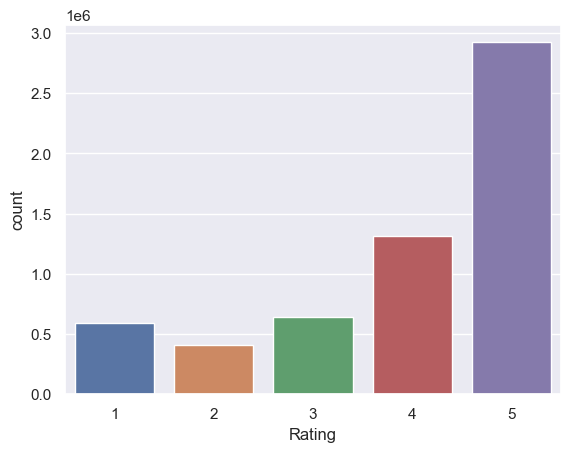

In [9]:
#Vemos cuantos hay de cada uno
sns.countplot(data=reseñas,x='Rating')

Se ve que el dataset esta bastante desbalanceado hacia lo favorable. Hay casi tantas reseñas de 5 estrellas como del resto de los valores. Y hay mas del doble de 4 y 5 estrellas que de 1, 2 y 3 estrellas. Igualmente, como no vamos a alimentar un modelo predictivo y es solamente para realizar análisis no hace falta balancear.

In [10]:
#Vamos a hacer el trabajo en una porción del dataset para observar el resultado y que los tiempos sean menores
prueba = reseñas.iloc[:1000000]             #Definimos cantidad de reseñas a tomar
reseña_sin_caracteres_raros = []
for i in range(prueba.shape[0]):
    reseña_sin_caracteres_raros.append(re.sub("[^a-zA-Z]"," ",str(prueba['Reseña'].values[i])))

In [11]:
#Agregamos la columna
prueba['Reseña_paso1'] = reseña_sin_caracteres_raros
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_12052\2735097145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso1'] = reseña_sin_caracteres_raros


,Rating,Reseña,Reseña_paso1
0,4,I love the food here. Service doesn't seem to ...,I love the food here Service doesn t seem to ...
1,5,You can't beat 1/2 price drinks during happy h...,You can t beat price drinks during happy h...
2,5,This place was surprisingly fast being that it...,This place was surprisingly fast being that it...
3,5,Everytime we come to Chattanooga we eat at thi...,Everytime we come to Chattanooga we eat at thi...
4,5,The steak was perfect.,The steak was perfect


In [12]:
text_tokenizado = []
for i in range(prueba.shape[0]):
    text_tokenizado.append(nltk.tokenize.word_tokenize(prueba['Reseña_paso1'].values[i].lower()))

In [13]:
#Agregamos la columna
prueba['Reseña_paso2'] = text_tokenizado
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_12052\3405440822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso2'] = text_tokenizado


,Rating,Reseña,Reseña_paso1,Reseña_paso2
0,4,I love the food here. Service doesn't seem to ...,I love the food here Service doesn t seem to ...,"[i, love, the, food, here, service, doesn, t, ..."
1,5,You can't beat 1/2 price drinks during happy h...,You can t beat price drinks during happy h...,"[you, can, t, beat, price, drinks, during, hap..."
2,5,This place was surprisingly fast being that it...,This place was surprisingly fast being that it...,"[this, place, was, surprisingly, fast, being, ..."
3,5,Everytime we come to Chattanooga we eat at thi...,Everytime we come to Chattanooga we eat at thi...,"[everytime, we, come, to, chattanooga, we, eat..."
4,5,The steak was perfect.,The steak was perfect,"[the, steak, was, perfect]"


In [14]:
#Importamos las stopwords de nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
#Le agregamos algunos adjetivos que no nos van a brindar informacion alguna (vamos actualizando)
agregar_a_sw = ['good','bad','awesome','awfull','love','like','well','ok','get','back','never','one','two','three','amazing'
                'four','five','go','would','got','said','us','came','ask','told','went','better','worst','great','best','horrible']
for p in agregar_a_sw:
    stopwords.append(p)

In [16]:
#Limpiamos la reseña de stopwords
text_sin_sw = []
for i in range(prueba.shape[0]):
    texto = prueba['Reseña_paso2'].values[i]
    lista = [word for word in texto if word not in stopwords]
    text_sin_sw.append(lista)

In [17]:
#Armamos columna
prueba['Reseña_paso3'] = text_sin_sw
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_12052\671245305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso3'] = text_sin_sw


,Rating,Reseña,Reseña_paso1,Reseña_paso2,Reseña_paso3
0,4,I love the food here. Service doesn't seem to ...,I love the food here Service doesn t seem to ...,"[i, love, the, food, here, service, doesn, t, ...","[food, service, seem, summit, location]"
1,5,You can't beat 1/2 price drinks during happy h...,You can t beat price drinks during happy h...,"[you, can, t, beat, price, drinks, during, hap...","[beat, price, drinks, happy, hour]"
2,5,This place was surprisingly fast being that it...,This place was surprisingly fast being that it...,"[this, place, was, surprisingly, fast, being, ...","[place, surprisingly, fast, insanely, busy, fo..."
3,5,Everytime we come to Chattanooga we eat at thi...,Everytime we come to Chattanooga we eat at thi...,"[everytime, we, come, to, chattanooga, we, eat...","[everytime, come, chattanooga, eat, location, ..."
4,5,The steak was perfect.,The steak was perfect,"[the, steak, was, perfect]","[steak, perfect]"


In [18]:
#Chequeamos
prueba.iloc[0].values

array([4,
       "I love the food here. Service doesn't seem to be as good as the Summit location, but not bad.",
       'I love the food here  Service doesn t seem to be as good as the Summit location  but not bad ',
       list(['i', 'love', 'the', 'food', 'here', 'service', 'doesn', 't', 'seem', 'to', 'be', 'as', 'good', 'as', 'the', 'summit', 'location', 'but', 'not', 'bad']),
       list(['food', 'service', 'seem', 'summit', 'location'])],
      dtype=object)

Lo realizado forma parte del proceso estándar. Vamos a intentar lemmatizar y vamos a ver cuanto demora. Tener en cuenta que lo estamos haciendo con, aproximadamente, 1/11 parte del dataset pero a la vez contemplar que se está haciendo de manera local. En caso de que el resultado sea aceptable podemos aplicar o no el lemmatizado.

In [17]:
#Importamos librería
from nltk.corpus import wordnet

#Definimos funcion
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [22]:
#Importamos el lemmatizer de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#Aplicamos el Lemmatizer (Esto puede tardar un ratito)
reseñas_lemmatizadas = []
for i in range(prueba.shape[0]):
    frase_tok = nltk.word_tokenize(prueba['Reseña_paso1'][i].lower())
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in frase_tok]
    reseñas_lemmatizadas.append(frase_lemma)

KeyboardInterrupt: 

226 minutos y aún no termino de correr. No es práctico. Vamos a hacerlo sin este proceso.

In [19]:
#Nos quedamos colamente con la última columna
prueba_filtrado = prueba.drop(columns=['Reseña','Reseña_paso1','Reseña_paso2'])
prueba_filtrado.head()

,Rating,Reseña_paso3
0,4,"[food, service, seem, summit, location]"
1,5,"[beat, price, drinks, happy, hour]"
2,5,"[place, surprisingly, fast, insanely, busy, fo..."
3,5,"[everytime, come, chattanooga, eat, location, ..."
4,5,"[steak, perfect]"


In [20]:
#Filtramos los de una estrella
una_estrella = prueba_filtrado[prueba_filtrado['Rating']==1]
una_estrella.reset_index(inplace=True,drop=True)
una_estrella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75656 entries, 0 to 75655
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        75656 non-null  int64 
 1   Reseña_paso3  75656 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [21]:
#Juntamos todos los comentarios de 1 estrella
comentarios_una_estrella = []
for i in range(una_estrella.shape[0]):
    comentarios_una_estrella += una_estrella['Reseña_paso3'][i]
comentarios_una_estrella

['toaster',
 'oven',
 'app',
 'aware',
 'way',
 'cancel',
 'order',
 'even',
 'though',
 'app',
 'call',
 'store',
 'unhelpful',
 'rude',
 'girl',
 'friend',
 'waited',
 'hour',
 'receive',
 'sweet',
 'tea',
 'unsweetened',
 'tea',
 'short',
 'staffed',
 'server',
 'food',
 'may',
 'great',
 'worth',
 'wait',
 'time',
 'employees',
 'sandwiches',
 'customer',
 'service',
 'actually',
 'pretty',
 'much',
 'everything',
 'else',
 'though',
 'worker',
 'know',
 'new',
 'sandwiches',
 'advertised',
 'toaster',
 'dying',
 'bug',
 'seat',
 'womens',
 'restroom',
 'locked',
 'mens',
 'restroom',
 'disgusting',
 'drinks',
 'watered',
 'point',
 'different',
 'shades',
 'water',
 'probably',
 'safe',
 'say',
 'customer',
 'eyebrows',
 'real',
 'make',
 'sure',
 'waste',
 'lunch',
 'break',
 'slow',
 'service',
 'luck',
 'draw',
 'order',
 'even',
 'fresh',
 'correct',
 'around',
 'drive',
 'took',
 'forever',
 'food',
 'enough',
 'menu',
 'options',
 'dead',
 'bugs',
 'light',
 'fixtures',
 'lo

In [22]:
#Observamos las frecuencias de cada palabra
frec_com_1_est = nltk.FreqDist(comentarios_una_estrella)
frec_com_1_est

FreqDist({'food': 34182, 'service': 19943, 'order': 18881, 'place': 13170, 'time': 12926, 'minutes': 10606, 'even': 9115, 'ordered': 8154, 'cold': 6940, 'manager': 6925, ...})

In [23]:
#Armamos dataframe
palabras_1_estrella = pd.DataFrame(list(frec_com_1_est.items()), columns = ["Palabra","Frequencia"])
palabras_1_estrella = palabras_1_estrella.sort_values(by='Frequencia',ascending=False)
palabras_1_estrella.head()

,Palabra,Frequencia
24,food,34182
33,service,19943
6,order,18881
85,place,13170
29,time,12926


In [24]:
palabras_1_estrella.head(10)

,Palabra,Frequencia
24,food,34182
33,service,19943
6,order,18881
85,place,13170
29,time,12926
117,minutes,10606
7,even,9115
266,ordered,8154
286,cold,6940
93,manager,6925


El algoritmo funciona y la celda que mas demoró, lo hizo alrededor de 3 minutos. Si extendemos a todo el dataset, no debiera demorar más de 40. Sin embargo, en vez de eso vamos a probar con todo el dataset de reviews a la que le hayan dado 1 estrella.

In [25]:
#Definimos funcion con todas las operaciones a realizar para cualquier valor de rating
def procesamientoResenas (dataframe,rating:int):
    df = dataframe[dataframe['Rating']==rating]
    df.reset_index(inplace=True,drop=True)
    reseñas_procesadas = []
    for i in range(df.shape[0]):
        texto1 = re.sub("[^a-zA-Z]"," ",str(df['Reseña'].values[i]))
        texto2 = nltk.tokenize.word_tokenize(texto1.lower())
        lista = [word for word in texto2 if word not in stopwords]
        reseñas_procesadas += lista
    frec_palabras = nltk.FreqDist(reseñas_procesadas)
    frec_palabras_df = pd.DataFrame(list(frec_palabras.items()), columns = ["Palabra","Frequencia"])
    return frec_palabras_df.sort_values(by='Frequencia',ascending=False)

In [26]:
palabras_1_estrella = procesamientoResenas(reseñas,1)
palabras_1_estrella.head(10)

,Palabra,Frequencia
24,food,401106
6,order,216402
33,service,212489
85,place,199581
29,time,178877
117,minutes,146417
266,ordered,144352
7,even,133178
228,asked,108858
287,restaurant,101051


In [27]:
palabras_1_estrella.head(50)

,Palabra,Frequencia
24,food,401106
6,order,216402
33,service,212489
85,place,199581
29,time,178877
117,minutes,146417
266,ordered,144352
7,even,133178
228,asked,108858
287,restaurant,101051


In [28]:
palabras_5_estrella = procesamientoResenas(reseñas,5)
palabras_5_estrella.head(10)

,Palabra,Frequencia
10,food,1497085
31,great,1452797
5,place,845806
12,service,797857
15,best,497037
70,delicious,478028
209,amazing,398020
33,friendly,391792
92,always,390921
64,time,384829
